If error occur, you may try remove the ocr_responses.data and ocr_training.data, then run digit_recognizer_training.ipynb again and re-build the 2 data files.

see also https://medium.com/@sudhirjain01dec/optical-character-recognizer-using-knn-and-opencv-part2-57637649079c

i 3
Detected object:  +11


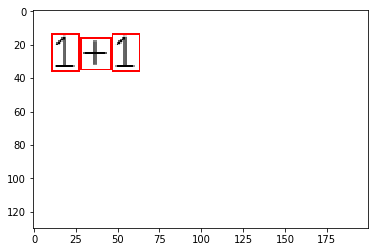

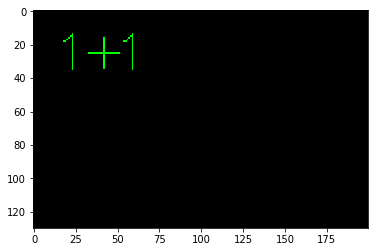

In [16]:
################################################################
# Previous file name: digit_recognizer_testing.py               #
# Description: Recognize and test digits on an image.           #
# original Author: Gökhan Sari                                  #
#################################################################

import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def test():
    pic_name="1+1.png"
    
    contour_dimension_from_h=14
    contour_dimension_to_h=23
    
    samples = np.loadtxt('./ocr_training.data', np.float32)
    responses = np.loadtxt('./ocr_responses.data', np.float32)            
    responses = responses.reshape((responses.size, 1))
    
    
    # reponses are chr of "+, 9... 2, 1"
    
    #image_to_test = Pic(pic_name="1+1.png", contour_dimension_from_h=21, contour_dimension_to_h=28)
    model = cv2.ml.KNearest_create()
    # model.train (training data , cv2.ml.ROW_SAMPLE, training label)
    model.train(samples, cv2.ml.ROW_SAMPLE, responses)
    
    
    im = cv2.imread(pic_name)
    out = np.zeros(im.shape, np.uint8)
    gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)    
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    thresh = cv2.adaptiveThreshold(blur, 255, 1, 1, 11, 1)
    
    strDetectedObj = "";
    _, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    
    i=0
    # len(contours) = 64
    for cnt in contours:
        #if cv2.contourArea(cnt) > contour_dimension_to_h:

        if cv2.contourArea(cnt) > (contour_dimension_to_h * 2):            
            i=i+1
            [x, y, w, h] = cv2.boundingRect(cnt)
            
            if h > contour_dimension_from_h and h < contour_dimension_to_h:
                
                cv2.rectangle(im, (x - 1, y - 1), (x + 1 + w, y + 1 + h), (255, 0, 0), 1)
                roi = thresh[y:y + h, x:x + w]
                roismall = cv2.resize(roi, (10, 10))

                roismall = roismall.reshape((1, 100))
                roismall = np.float32(roismall)
                retval, results, neigh_resp, dists = model.findNearest(roismall, k=1)
                                
                string = str(chr(int((results[0][0]))))
                
                strDetectedObj += string
                cv2.putText(out, string, (x, y + h), 0, 1, (0, 255, 0))
    print('i',i)           
    print("Detected object: ", strDetectedObj)
    
    plt.imshow(im,cmap='gray')
    plt.show()

    plt.imshow(out,cmap='gray')
    plt.show()
    
test()